**Load Data**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger, ModelCheckpoint, ReduceLROnPlateau

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
usageData = pd.read_csv('drive/MyDrive/Colab Notebooks/source_data.csv')

In [ ]:
data = usageData.drop(['collection_id'], axis=1)
data = data.drop(['instance_index'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
label = data['type']
data = data.drop(['type'], axis=1)
data = data.drop(['priority'], axis=1)
data = data.drop(['scheduling_class'], axis=1)
data = data.drop(['resubmit_time'], axis=1)

scaler1 = MinMaxScaler(feature_range = (0,1))
data = scaler1.fit_transform(data)

In [ ]:
print(data)

[[0.01250774 0.01852029 0.00418736]
 [0.02671933 0.0103734  0.00406035]
 [0.00747367 0.00919421 0.00263151]
 ...
 [0.         0.03434844 0.01458322]
 [0.02575124 0.02793065 0.01312551]
 [0.02249845 0.03246181 0.01967181]]


In [ ]:
trainPercent = 0.7
validPercent = 0.8

data_to_train = data[:int(len(data)*trainPercent)]
label_to_train = label[:int(len(data)*trainPercent)]

data_to_valid = data[int(len(data)*trainPercent):int(len(data)*validPercent)]
label_to_valid = label[int(len(data)*trainPercent):int(len(data)*validPercent)]

data_to_test = data[int(len(data)*validPercent):]
label_to_test = label[int(len(data)*validPercent):]

In [ ]:
print(len(data_to_train))
print(len(label_to_train))
print(len(data_to_valid))
print(len(label_to_valid))
print(len(data_to_test))
print(len(label_to_test))

20183094
20183094
2883299
2883299
5766599
5766599


In [ ]:
x_train = np.array(data_to_train)
y_train = np.array(label_to_train)

x_valid = np.array(data_to_valid)
y_valid = np.array(label_to_valid)

x_test = np.array(data_to_test)
y_test = np.array(label_to_test)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_valid = np.reshape(x_valid, (x_valid.shape[0], 1, x_valid.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

x_valid = tf.convert_to_tensor(x_valid)
y_valid = tf.convert_to_tensor(y_valid)

x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)

In [ ]:
print(x_train)

tf.Tensor(
[[[1.25077447e-02 1.85202877e-02 4.18736169e-03 2.28000000e-01
   8.14662273e-04 0.00000000e+00]]

 [[2.67193309e-02 1.03734015e-02 4.06034506e-03 2.28000000e-01
   3.14332784e-04 0.00000000e+00]]

 [[7.47366791e-03 9.19421497e-03 2.63151057e-03 2.28000000e-01
   4.15156507e-05 0.00000000e+00]]

 ...

 [[0.00000000e+00 3.10799266e-02 1.03112998e-02 4.00000000e-01
   2.61943987e-05 1.00000000e+00]]

 [[1.35145601e-02 1.17371227e-02 6.87176460e-03 4.00000000e-01
   9.88467875e-07 1.00000000e+00]]

 [[3.87236679e-05 1.38312380e-02 2.88900924e-03 4.00000000e-01
   2.61943987e-05 1.00000000e+00]]], shape=(20183094, 1, 6), dtype=float64)


**Define Model**

In [ ]:
n_units=512
batch_size=128
n_epochs=30
patience=10

GRUmodel = Sequential()
GRUmodel.add(GRU(n_units, return_sequences=True, input_shape=(x_train.shape[1:])))
GRUmodel.add(Dropout(0.5))
GRUmodel.add(GRU(n_units))
GRUmodel.add(Dropout(0.5))
GRUmodel.add(Dense(1))
GRUmodel.compile(loss='mean_squared_error', 
              metrics=['mse','mape'],
              optimizer='adam')
GRUmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 512)            794112    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 512)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 512)               1575936   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 2,370,561
Trainable params: 2,370,561
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_units=512
batch_size=128
n_epochs=30
patience=10

LSTMmodel = Sequential()
LSTMmodel.add(LSTM(n_units, return_sequences=True, input_shape=(x_train.shape[1:])))
LSTMmodel.add(Dropout(0.5))
LSTMmodel.add(LSTM(n_units))
LSTMmodel.add(Dropout(0.5))
LSTMmodel.add(Dense(1))
LSTMmodel.compile(loss='mean_squared_error', 
              metrics=['mse','mape'],
              optimizer='adam')
LSTMmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 512)            1062912   
_________________________________________________________________
dropout (Dropout)            (None, 1, 512)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 3,162,625
Trainable params: 3,162,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
GRUmodel.fit(x_train, y_train, 
     epochs=n_epochs, batch_size=batch_size, 
     validation_data=(x_valid, y_valid), 
     callbacks=[ReduceLROnPlateau(), 
     ModelCheckpoint('GRU-N{}-D0.5-B{}.h5'.format(n_units,batch_size)),
     EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10),
     CSVLogger(f"GRU-log-Nodes-{n_units}-dropout-0.5-batchsize-{batch_size}.csv")], 
     verbose=1, shuffle=False)

Epoch 1/30
157681/157681 [==============================] - 583s 4ms/step - loss: 0.0441 - mse: 0.0441 - mape: 1.1760 - val_loss: 0.0427 - val_mse: 0.0427 - val_mape: 1.8725
Epoch 2/30
157681/157681 [==============================] - 586s 4ms/step - loss: 0.0300 - mse: 0.0300 - mape: 0.7293 - val_loss: 0.0427 - val_mse: 0.0427 - val_mape: 1.9446
Epoch 3/30
157681/157681 [==============================] - 573s 4ms/step - loss: 0.0309 - mse: 0.0309 - mape: 0.7464 - val_loss: 0.0437 - val_mse: 0.0437 - val_mape: 2.0090
Epoch 4/30
157681/157681 [==============================] - 576s 4ms/step - loss: 0.0297 - mse: 0.0297 - mape: 0.7178 - val_loss: 0.0424 - val_mse: 0.0424 - val_mape: 1.8945
Epoch 5/30
157681/157681 [==============================] - 578s 4ms/step - loss: 0.0297 - mse: 0.0297 - mape: 0.7205 - val_loss: 0.0420 - val_mse: 0.0420 - val_mape: 1.8681
Epoch 6/30
157681/157681 [==============================] - 579s 4ms/step - loss: 0.0295 - mse: 0.0295 - mape: 0.7186 - val_loss: 

In [ ]:
LSTMmodel.fit(x_train, y_train, 
      epochs=n_epochs, batch_size=batch_size, 
      validation_data=(x_test, y_test), 
      callbacks=[ReduceLROnPlateau(), 
      ModelCheckpoint('LSTM-N{}-D0.5-B{}.h5'.format(n_units,batch_size)),
      EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10),
      CSVLogger(f"LSTM-log-Nodes-{n_units}-dropout-0.5-batchsize-{batch_size}.csv")], 
      verbose=1, shuffle=False)

Epoch 1/30
157681/157681 [==============================] - 651s 4ms/step - loss: 0.0448 - mse: 0.0448 - mape: 1.1396 - val_loss: 0.1295 - val_mse: 0.1295 - val_mape: 3.6552
Epoch 2/30
157681/157681 [==============================] - 642s 4ms/step - loss: 0.0261 - mse: 0.0261 - mape: 0.6758 - val_loss: 0.2970 - val_mse: 0.2970 - val_mape: 4.9116
Epoch 3/30
157681/157681 [==============================] - 638s 4ms/step - loss: 0.0248 - mse: 0.0248 - mape: 0.6428 - val_loss: 0.0590 - val_mse: 0.0590 - val_mape: 2.1966
Epoch 4/30
157681/157681 [==============================] - 637s 4ms/step - loss: 0.0239 - mse: 0.0239 - mape: 0.6213 - val_loss: 0.0541 - val_mse: 0.0541 - val_mape: 2.2324
Epoch 5/30
157681/157681 [==============================] - 634s 4ms/step - loss: 0.0236 - mse: 0.0236 - mape: 0.6165 - val_loss: 0.0460 - val_mse: 0.0460 - val_mape: 1.9483
Epoch 6/30
157681/157681 [==============================] - 628s 4ms/step - loss: 0.0231 - mse: 0.0231 - mape: 0.6019 - val_loss: 

**Predicting With GRU**

In [ ]:
GRUmodel = load_model('GRU-N512-D0.5-B128.h5')
# LSTMmodel = load_model('LSTM-N512-D0.5-B128.h5')

In [ ]:
GRU = pd.read_csv('GRU-log-Nodes-512-dropout-0.5-batchsize-128.csv')
# LSTM = pd.read_csv('LSTM-log-Nodes-512-dropout-0.5-batchsize-128.csv')

Text(0.5, 1.0, 'GRU Training Loss')

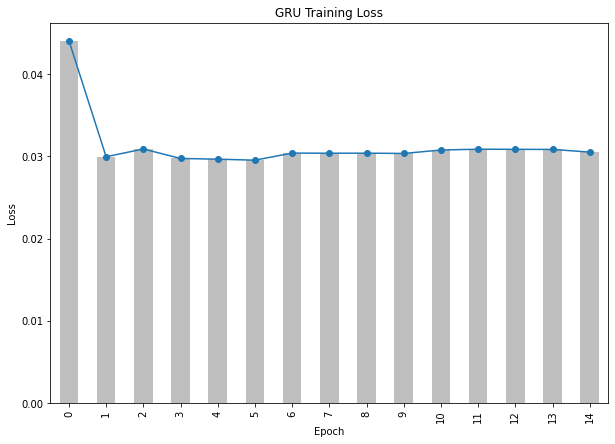

In [ ]:
plt.figure(figsize=(10,7))
ax = GRU['loss'].plot(x='epoch', marker='o')
GRU['loss'].plot.bar(x='epoch',ax=ax,alpha=0.5,color='gray')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('GRU Training Loss')

In [ ]:
plt.figure(figsize=(10,7))
ax = LSTM['loss'].plot(x='epoch', marker='o')
LSTM['loss'].plot.bar(x='epoch',ax=ax,alpha=0.5,color='gray')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('LSTM Training Loss')

Text(0.5, 1.0, 'Validation Loss')

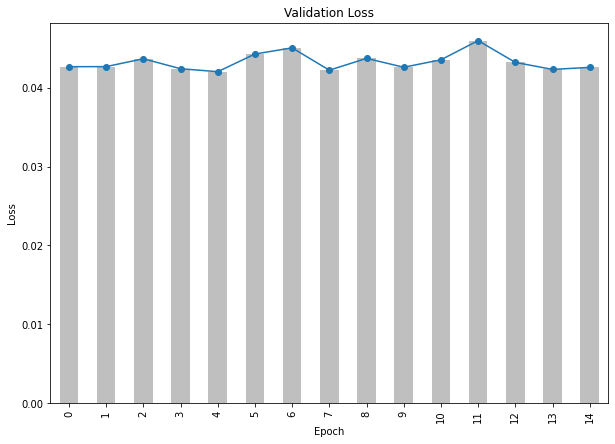

In [ ]:
plt.figure(figsize=(10,7))
ax = GRU['val_loss'].plot(x='epoch', marker='o')
GRU['val_loss'].plot.bar(x='epoch',ax=ax,alpha=0.5,color='gray')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Validation Loss')

Text(0.5, 1.0, 'Validation Loss')

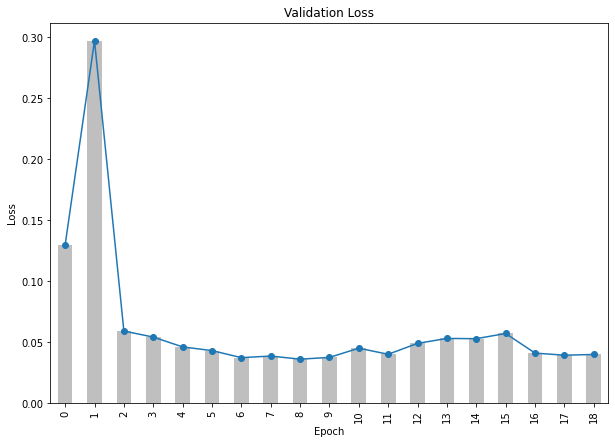

In [ ]:
plt.figure(figsize=(10,7))
ax = LSTM['val_loss'].plot(x='epoch', marker='o')
LSTM['val_loss'].plot.bar(x='epoch',ax=ax,alpha=0.5,color='gray')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Validation Loss')

In [ ]:
print(GRUmodel.evaluate(x_test, y_test))
# print(LSTMmodel.evaluate(x_test, y_test))

24491/24491 [==============================] - 50s 2ms/step - loss: 6.6395e-05 - mse: 4.4086e-09 - mape: 9.4840e-04
[6.639501953031868e-05, 4.408641451902895e-09, 0.0009483956964686513]


In [ ]:
val_predict_GRU = GRUmodel.predict(x_test)

In [ ]:
val_predict_LSTM = LSTMmodel.predict(x_test)

In [ ]:
print(len(val_predict_GRU.round()))

783682


In [ ]:
predict_GRU = pd.DataFrame(val_predict_GRU.round(), columns=['prediction'])

In [ ]:
predict_LSTM = pd.DataFrame(val_predict_LSTM.round(), columns=['prediction'])

In [ ]:
aaa = []
for i, row in predict_GRU.iterrows():
  aaa.append(row['prediction'])

In [ ]:
bbb = []
for i, row in predict_LSTM.iterrows():
  bbb.append(row['prediction'])

In [ ]:
print(len(aaa))
# print(len(bbb))

783681


In [ ]:
test_label = pd.DataFrame(label_to_test)

In [ ]:
test_label.insert(1, 'predict_GRU', aaa)

In [ ]:
test_label.insert(1, 'predict_LSTM', bbb)

In [ ]:
print(test_label.head())

                               type  predict_LSTM
time                                             
1970-01-01 00:13:21.692265143     7           7.0
1970-01-01 00:18:48.854027373     6           7.0
1970-01-01 00:03:34.578355654     5           7.0
1970-01-01 00:41:17.992417959     7           7.0
1970-01-01 00:03:03.443363380     7           7.0


In [ ]:
GRU_predict_5_5 = 0
GRU_predict_5_6 = 0
GRU_predict_5_7 = 0
GRU_predict_6_5 = 0
GRU_predict_6_6 = 0
GRU_predict_6_7 = 0
GRU_predict_7_5 = 0
GRU_predict_7_6 = 0
GRU_predict_7_7 = 0
# LSTM_predict_5_5 = 0
# LSTM_predict_5_6 = 0
# LSTM_predict_5_7 = 0
# LSTM_predict_6_5 = 0
# LSTM_predict_6_6 = 0
# LSTM_predict_6_7 = 0
# LSTM_predict_7_5 = 0
# LSTM_predict_7_6 = 0
# LSTM_predict_7_7 = 0
for i, row in test_label.iterrows():
  if row['type'] == 5:
    if row['predict_GRU'] == 5.0:
      GRU_predict_5_5 += 1
    # if row['predict_LSTM'] == 5.0:
    #   LSTM_predict_5_5 += 1
    if row['predict_GRU'] == 6.0:
      GRU_predict_5_6 += 1
    # if row['predict_LSTM'] == 6.0:
    #   LSTM_predict_5_6 += 1
    if row['predict_GRU'] == 7.0:
      GRU_predict_5_7 += 1
    # if row['predict_LSTM'] == 7.0:
    #   LSTM_predict_5_7 += 1
  if row['type'] == 6:
    if row['predict_GRU'] == 5.0:
      GRU_predict_6_5 += 1
    # if row['predict_LSTM'] == 5.0:
    #   LSTM_predict_6_5 += 1
    if row['predict_GRU'] == 6.0:
      GRU_predict_6_6 += 1
    # if row['predict_LSTM'] == 6.0:
    #   LSTM_predict_6_6 += 1
    if row['predict_GRU'] == 7.0:
      GRU_predict_6_7 += 1
    # if row['predict_LSTM'] == 7.0:
    #   LSTM_predict_6_7 += 1
  if row['type'] == 7:
    if row['predict_GRU'] == 5.0:
      GRU_predict_7_5 += 1
    # if row['predict_LSTM'] == 5.0:
    #   LSTM_predict_7_5 += 1
    if row['predict_GRU'] == 6.0:
      GRU_predict_7_6 += 1
    # if row['predict_LSTM'] == 6.0:
    #   LSTM_predict_7_6 += 1
    if row['predict_GRU'] == 7.0:
      GRU_predict_7_7 += 1
    # if row['predict_LSTM'] == 7.0:
    #   LSTM_predict_7_7 += 1

In [ ]:
# print(type_5)
# print(type_6)
# print(type_7)
# print()
print(GRU_predict_5_5)
print(GRU_predict_5_6)
print(GRU_predict_5_7)
print(GRU_predict_6_5)
print(GRU_predict_6_6)
print(GRU_predict_6_7)
print(GRU_predict_7_5)
print(GRU_predict_7_6)
print(GRU_predict_7_7)
# print()
# print(LSTM_predict_5_5)
# print(LSTM_predict_5_6)
# print(LSTM_predict_5_7)
# print(LSTM_predict_6_5)
# print(LSTM_predict_6_6)
# print(LSTM_predict_6_7)
# print(LSTM_predict_7_5)
# print(LSTM_predict_7_6)
# print(LSTM_predict_7_7)

0
0
28891
0
0
96364
0
0
5641344
